# 3

## 3.1

### Importar librerias y leer el dataset

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/LOL.csv")

### Exploracion de datos

In [19]:
# Exploracion de datos
# Para saber las columnas del dataset
print(list(df.columns))

# Para saber si el dataset esta balanceado
print("- - - - - - - BALANCEO - - - - - - -")
balanceo = df["blueWins"].value_counts()
print(df["blueWins"].value_counts())

p0 = balanceo[0]/(balanceo[0]+balanceo[1])
p1 = balanceo[1]/(balanceo[0]+balanceo[1])

print("Proporcion de 0s: ", p0)
print("Proporcion de 1s: ", p1)

print("Como se puede evidenciar ambos resultados son aproximadamente 0.5 por lo tanto se puede decir que el dataset esta balanceado ")



['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']
- - - - - - - BALANCEO - - - - - - -
blueWins
0    4949
1    4930
Name: count, dtype: int64
Proporcion de 0s:  0.5009616357930965
Proporcion de 1s:  0.4990383642069035
Como se puede evidenciar ambos resultados son aproximadamente 0.5 por lo tanto se puede decir que el datas

In [20]:
# Obtener tipos de datos
tipos_de_datos = df.dtypes.value_counts()

# # Mostrar tipos de datos con nombres de columnas
print("- - - - - - - TIPOS DE DATOS - - - - - - -")
print(tipos_de_datos)

# Buscando valores nulls
print("- - - - - - - VALORES NULLS - - - - - - -")
nulos = df.isnull()
print(nulos)

nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))

- - - - - - - TIPOS DE DATOS - - - - - - -
int64      34
float64     6
Name: count, dtype: int64
- - - - - - - VALORES NULLS - - - - - - -
      gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0      False     False            False               False           False   
1      False     False            False               False           False   
2      False     False            False               False           False   
3      False     False            False               False           False   
4      False     False            False               False           False   
...      ...       ...              ...                 ...             ...   
9874   False     False            False               False           False   
9875   False     False            False               False           False   
9876   False     False            False               False           False   
9877   False     False            False               False           F

### Modelo (Regresion Logistica)

In [23]:
# Regresion logistica

# Obtener la muestra
X = df.drop(columns=["blueWins"])  
y = df["blueWins"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


### Resultados

In [32]:

accuracy = accuracy_score(y_test, y_pred)
print("Al estar los datos balanceados se puede decir que el accuracy es una buena metrica para evaluar el modelo")
print(f"Accuracy: {accuracy:.2f}")

print("Precision se uso principalmente para saber cuantos de los casos positivos fueron clasificados correctamente")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

print("Recall se uso principalmente para saber cuantos de los casos positivos fueron clasificados correctamente")
Recall = recall_score(y_test, y_pred)
print(f"Recall: {Recall:.2f}")


Al estar los datos balanceados se puede decir que el accuracy es una buena metrica para evaluar el modelo
Accuracy: 0.73
Precision se uso principalmente para saber cuantos de los casos positivos fueron clasificados correctamente
Precision: 0.73
Recall se uso principalmente para saber cuantos de los casos positivos fueron clasificados correctamente
Recall: 0.74


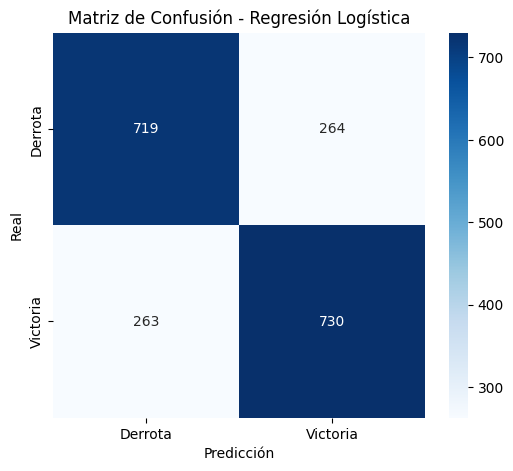

In [28]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Derrota", "Victoria"], yticklabels=["Derrota", "Victoria"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

## 3.2

### Importar librerias y leer el dataset

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/LOL.csv")